<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 7 (midnight), 2024 -->

# Project 1 on Machine Learning, deadline October 7 (midnight), 2024
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **September 2**

## Preamble: Note on writing reports, using reference material, AI and other tools

We want you to answer the three different projects by handing in
reports written like a standard scientific/technical report.  The link
at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ProjectWriting/projectwriting.ipynb>
gives some guidance. See also the grading suggestion at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>.

Furthermore, at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ReportExample/>
you can find examples of previous reports. How to write reports will
also be discussed during the various lab sessions. Please do ask us if you are in doubt.

When using codes and material from other  sources, you should refer to these in the bibliography of your report, indicating  wherefrom you for example
got the code, whether this is from the lecture notes, softwares like
Scikit-Learn, TensorFlow, PyTorch or  other sources. These should
always be cited correctly. How to cite some of the libraries is often
indicated from their corresponding GitHub sites or websites, see for example how to cite Scikit-Learn at  <https://scikit-learn.org/dev/about.html>. 

We enocurage you to use tools like
[ChatGPT](https://openai.com/chatgpt/) or similar in writing the report. If you use for example ChatGPT,
please do cite it properly and include (if possible) your questions and answers as an addition to the report. This can
be uploaded to for example your website, GitHub/GitLab or similar as supplemental material.

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method.
In addition to the scientific part, in this course we want also to
give you an experience in writing scientific reports.

**A small recommendation when developing the codes here**. Instead of
jumping on to the two-dimensional function described below, we
recommend to do the code development and testing with a simpler
one-dimensional function, similar to those discussed in the exercises
of weeks 35 and 36. A simple test, as discussed during the lectures the first
three weeks is to set the design matrix equal to the identity
matrix. Then your model should give a mean square error which is exactly equal to zero.
When you are sure that your codes function well, you can then replace
the one-dimensional test function with the two-dimensional **Franke** function
discussed here.

The Franke function serves as a stepping stone towards the analysis of
real topographic data. The latter is the last part of this project.

### Description of two-dimensional function

We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.

The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  In a sense, our data are thus scaled to a particular domain for the input values.

Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and a $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as a
resampling technique.  After that we will include the cross-validation
technique.

We can
use a uniform distribution to set up the arrays of values for $x$ and
$y$, or as in the example below just a set of fixed values for $x$ and
$y$ with a given step size.  We will fit a function (for example a
polynomial) of $x$ and $y$.  Thereafter we will repeat much of the
same procedure using the Ridge and Lasso regression methods,
introducing thus a dependence on the bias (penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.

The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

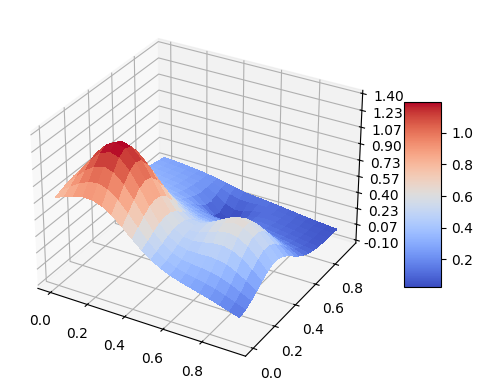

In [4]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

If you wish to compare your results with other on the Franke function or other popular functions tested with linear regression, see the list in Figure 1 of the article by Cook et al at <https://arxiv.org/abs/2401.11694>.

### Part a) : Ordinary Least Square (OLS) on the Franke function

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ and $y$ up to fifth order.

Evaluate the mean Squared error (MSE)

$$
MSE(\boldsymbol{y},\tilde{\boldsymbol{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\boldsymbol{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Plot the resulting scores (MSE and R$^2$) as functions of the polynomial degree (here up to polymial degree five).
Plot also the parameters $\beta$ as you increase the order of the polynomial. Comment your results.

Your code has to include a scaling/centering of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.

You can easily reuse the solutions to your exercises from week 35 and week 36.
See also the lecture slides from week 35 and week 36.

On scaling, we recommend reading the following section from the scikit-learn software description, see <https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section>.

### Part b): Adding Ridge regression for  the Franke function

Write your own code for the Ridge method, either using matrix
inversion or the singular value decomposition as done in the previous
exercise. The lecture notes from week 35 and 36 contain more information. Furthermore, the numerical exercise from week 36 is something you can reuse here.

Perform the same analysis as you did in the previous exercise but now for different values of $\lambda$. Compare and
analyze your results with those obtained in part a) with the ordinary least squares method. Study the
dependence on $\lambda$.

### Part c): Adding Lasso for the Franke function

This exercise is essentially a repeat of the previous two ones, but now
with Lasso regression. Write either your own code (difficult and optional) or, in this case,
you can also use the functionalities of **Scikit-Learn** (recommended). Keep in mind that the library **Scikit-Learn** excludes the intercept by default. 
Give a
critical discussion of the three methods and a judgement of which
model fits the data best.

### Part d): Paper and pencil part

This exercise deals with various mean values and variances in  linear regression method (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)). The exercise is also part of the weekly exercises for week 37.

The assumption we have made is 
that there exists a continuous function $f(\boldsymbol{x})$ and  a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$
which describes our data

$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$

We then approximate this function $f(\boldsymbol{x})$ with our model $\boldsymbol{\tilde{y}}$ from the solution of the linear regression equations (ordinary least squares OLS), that is our
function $f$ is approximated by $\boldsymbol{\tilde{y}}$ where we minimized  $(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2$, with

$$
\boldsymbol{\tilde{y}} = \boldsymbol{X}\boldsymbol{\beta}.
$$

The matrix $\boldsymbol{X}$ is the so-called design or feature matrix. 

Show that  the expectation value of $\boldsymbol{y}$ for a given element $i$

$$
\mathbb{E}(y_i)  =\sum_{j}x_{ij} \beta_j=\mathbf{X}_{i, \ast} \, \boldsymbol{\beta},
$$

and that
its variance is

$$
\mbox{Var}(y_i)  = \sigma^2.
$$

Hence, $y_i \sim N( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, that is $\boldsymbol{y}$ follows a normal distribution with 
mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.

With the OLS expressions for the optimal parameters $\boldsymbol{\hat{\beta}}$ show that

$$
\mathbb{E}(\boldsymbol{\hat{\beta}}) = \boldsymbol{\beta}.
$$

Show finally that the variance of $\boldsymbol{\beta}$ is

$$
\mbox{Var}(\boldsymbol{\hat{\beta}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$

We can use the last expression when we define a so-called confidence interval for the parameters $\beta$. 
A given parameter $\beta_j$ is given by the diagonal matrix element of the above matrix.

### Part e): Bias-variance trade-off and resampling techniques

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.
**We will only use the simpler ordinary least squares here**.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

As in part d), we assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this in terms of a term which contains the variance of the model itself (the so-called variance term), a
term which measures the deviation from the true data and the mean value of the model (the bias term) and finally the variance of the noise.
That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

The answer to this exercise should be included in the theory part of the report.  This exercise is also part of the weekly exercises of week 38.
Explain what the terms mean and discuss their interpretations.

Perform then a bias-variance analysis of the Franke function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

### Part g): Analysis of real data

With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises a-f. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,

Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2023/Project1/DataFiles>

In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

In [5]:
# scipy.misc.imread

NameError: name 'scipy' is not defined

Here is a simple part of a Python code which reads and plots the data
from such files

In [20]:
# pip install tifffile
# !pip install imagecodecs
# !pip install pillow
# !pip install imageio


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 9.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


If you should have problems in downloading the digital terrain data,
we provide two examples under the data folder of project 1. One is
from a region close to Stavanger in Norway and the other Møsvatn
Austfjell, again in Norway.
Feel free to produce your own terrain data.

Alternatively, if you would like to use another data set, feel free to do so. This could be data close to your reseach area or simply a data set you found interesting. See for example [kaggle.com](https://www.kaggle.com/datasets) for examples.

Our final part deals with the parameterization of your digital terrain
data (or your own data).  We will apply all three methods for linear regression, the same type (or higher order) of polynomial
approximation and cross-validation as resampling technique to evaluate which
model fits the data best.

At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).

/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_53297/3567106508.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain1 = imread('Raw_Data/SRTM_data_Norway_1.tif')
/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_53297/3567106508.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain2 = imread('Raw_Data/SRTM_data_Norway_2.tif')


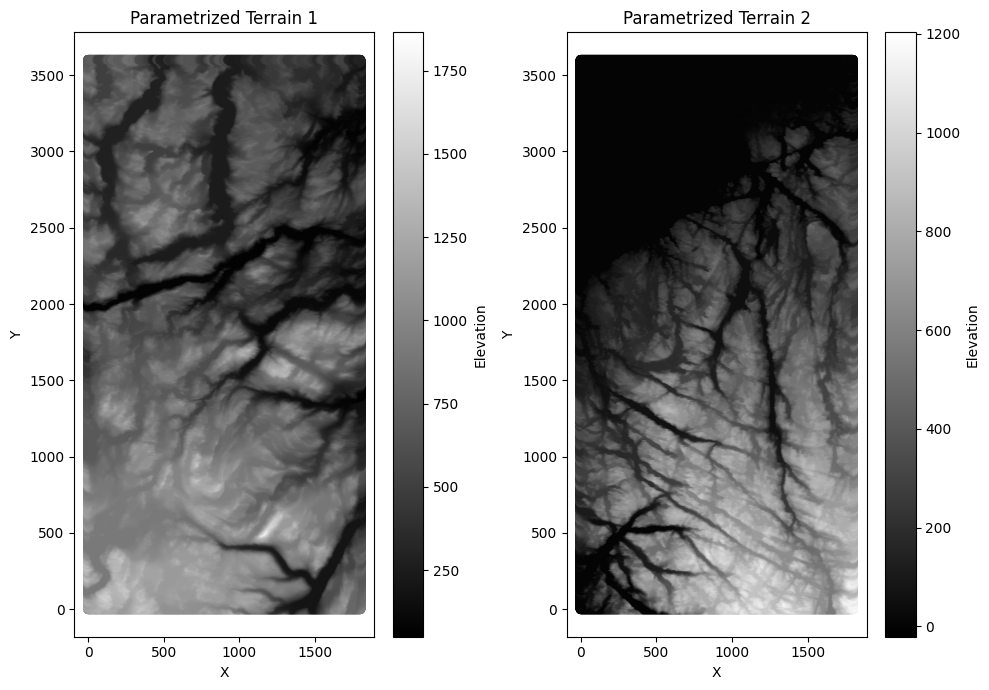

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from imageio import imread
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm

# # Load the terrain data
# terrain1 = imread('Raw_Data/SRTM_data_Norway_1.tif')
# terrain2 = imread('Raw_Data/SRTM_data_Norway_2.tif')
# n, m = terrain1.shape

# # meshgrid
# x = np.linspace(0, m - 1, m)
# y = np.linspace(0, n - 1, n)
# x, y = np.meshgrid(x, y)

# # Flatten the meshgrid and terrain data into 1D arrays for linear regression
# x_flat = x.ravel()
# y_flat = y.ravel()
# z1_flat = terrain1.ravel()  # Elevation data for terrain1
# z2_flat = terrain2.ravel()  # Elevation data for terrain2

# # Display the parametrized data
# plt.figure(figsize=(10, 7))
# plt.subplot(1, 2, 1)
# plt.scatter(x_flat, y_flat, c=z1_flat, cmap='gray')
# plt.colorbar(label='Elevation')
# plt.title('Parametrized Terrain 1')
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.subplot(1, 2, 2)
# plt.scatter(x_flat, y_flat, c=z2_flat, cmap='gray')
# plt.colorbar(label='Elevation')
# plt.title('Parametrized Terrain 2')
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()

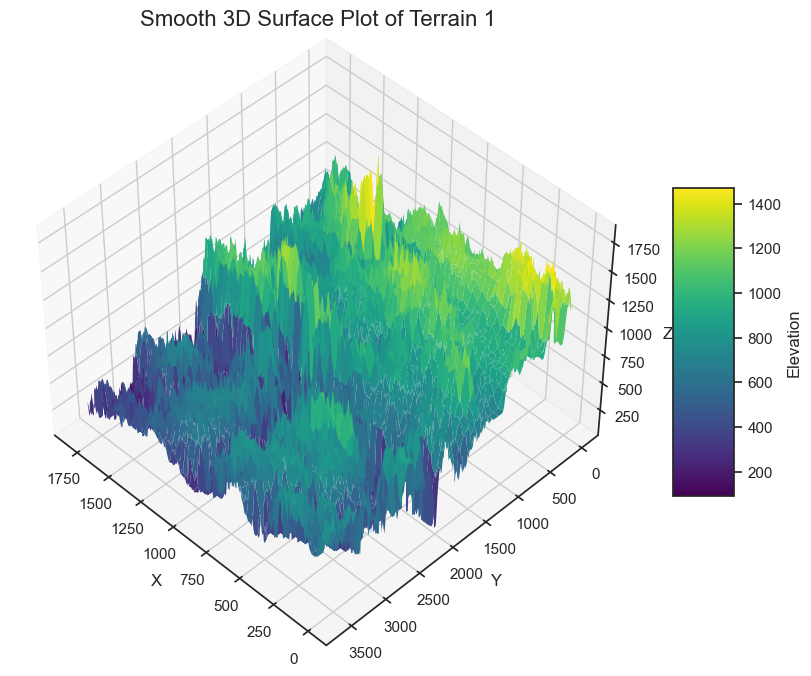

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import zoom
import warnings

warnings.filterwarnings('ignore')

terrain1 = imread('Raw_Data/SRTM_data_Norway_1.tif')
n, m = terrain1.shape

smooth_factor = 4
terrain_smooth = zoom(terrain1, smooth_factor)

n_smooth, m_smooth = terrain_smooth.shape
x = np.linspace(0, m - 1, m_smooth)
y = np.linspace(0, n - 1, n_smooth)
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 
surface = ax.plot_surface(x, y, terrain_smooth, cmap='viridis', edgecolor='none', antialiased=True)
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5, label='Elevation')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title('Smooth 3D Surface Plot of Terrain 1', fontsize=16)
ax.view_init(elev=45, azim=135)

# Show plot
plt.show()

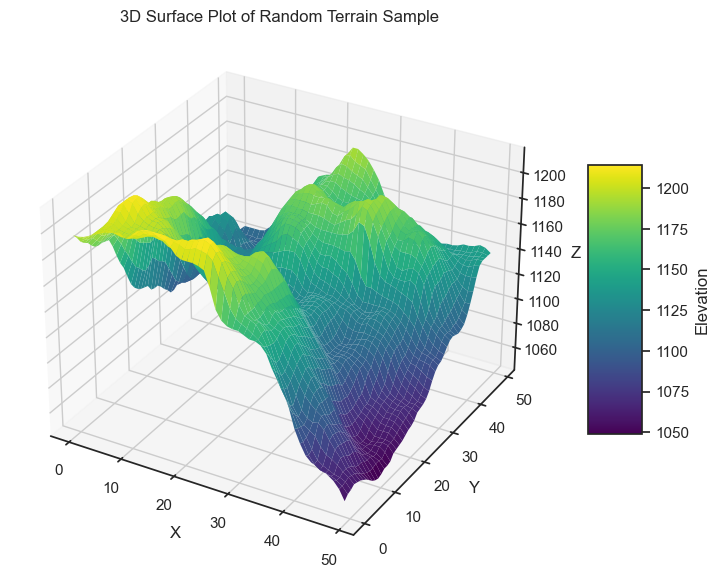

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

np.random.seed(28975)
terrain1 = imread('Raw_Data/SRTM_data_Norway_1.tif')
n, m = terrain1.shape

# Sample size
sample_size = 50

# Generate random starting coordinates ensuring the sample fits within the image
start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)

# Extract a random 20x20 sample
terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(x_sample, y_sample, terrain_sample, cmap='viridis', edgecolor='none')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5, label='Elevation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Surface Plot of Random Terrain Sample')

# plt.savefig('terrain_random_sample_plot.pdf', format='pdf')

plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

n, m = terrain1.shape

sample_size = 1500     # --> MODIFY THIS FOR TESTING
max_degree = 30           # ––> MODIFY THIS FOR TESTING

start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)

terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

# meshgrid
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

X = np.column_stack((x_sample.ravel(), y_sample.ravel()))
terrain_target = terrain_sample.ravel()

mse_train_values = []
mse_test_values = []
r2_train_values = []
r2_test_values = []

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, terrain_target, test_size=0.2, random_state=10)

for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)

    # Print metrics
    print(f"Degree: {degree} \t Train MSE: {mse_train:.4f} \t Test MSE: {mse_test:.4f} \t Train R²: {r2_train:.4f} \t Test R²: {r2_test:.4f}")

# PLOT
sns.set_theme(style="white")

# MSE Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE', color='tab:blue', linewidth=4)
plt.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE', linestyle='--', color='tab:orange', linewidth=4)
plt.xlabel('Degree of Polynomial', fontsize=16)
plt.ylabel('log(MSE)', fontsize=16)
plt.xticks(ticks=range(1, max_degree + 1))
plt.title('MSE vs. degree of polynomial', fontsize=18)
plt.yscale('log')
plt.legend()
plt.show()

# R² Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), r2_train_values, label='Train R²', color='tab:green', linewidth=4)
plt.plot(range(1, max_degree + 1), r2_test_values, label='Test R²', linestyle='--', color='tab:red', linewidth=4)
plt.xlabel('Degree of Polynomial', fontsize=16)
plt.ylabel('R²', fontsize=16)
# plt.ylim(0.4, 1.1)
plt.xticks(ticks=range(1, max_degree + 1))
plt.title('R2 vs. degree of polynomial', fontsize=18)
plt.legend()
plt.show()

Degree: 1 	 Train MSE: 46668.7215 	 Test MSE: 46824.3729 	 Train R²: 0.3473 	 Test R²: 0.3465
Degree: 2 	 Train MSE: 43623.1016 	 Test MSE: 43775.3241 	 Train R²: 0.3899 	 Test R²: 0.3890
Degree: 3 	 Train MSE: 40032.2945 	 Test MSE: 40139.8506 	 Train R²: 0.4401 	 Test R²: 0.4398
Degree: 4 	 Train MSE: 35256.0948 	 Test MSE: 35329.1818 	 Train R²: 0.5069 	 Test R²: 0.5069
Degree: 5 	 Train MSE: 32371.9529 	 Test MSE: 32414.8045 	 Train R²: 0.5473 	 Test R²: 0.5476
Degree: 6 	 Train MSE: 41485.7833 	 Test MSE: 41572.1220 	 Train R²: 0.4198 	 Test R²: 0.4198
Degree: 7 	 Train MSE: 29960.5370 	 Test MSE: 30096.8097 	 Train R²: 0.5810 	 Test R²: 0.5799
Degree: 8 	 Train MSE: 26701.5155 	 Test MSE: 26805.3012 	 Train R²: 0.6266 	 Test R²: 0.6259
Degree: 9 	 Train MSE: 26998.4621 	 Test MSE: 27116.8457 	 Train R²: 0.6224 	 Test R²: 0.6215
Degree: 10 	 Train MSE: 27065.4759 	 Test MSE: 27200.1585 	 Train R²: 0.6215 	 Test R²: 0.6204
Degree: 11 	 Train MSE: 28604.5916 	 Test MSE: 28730.6363 	

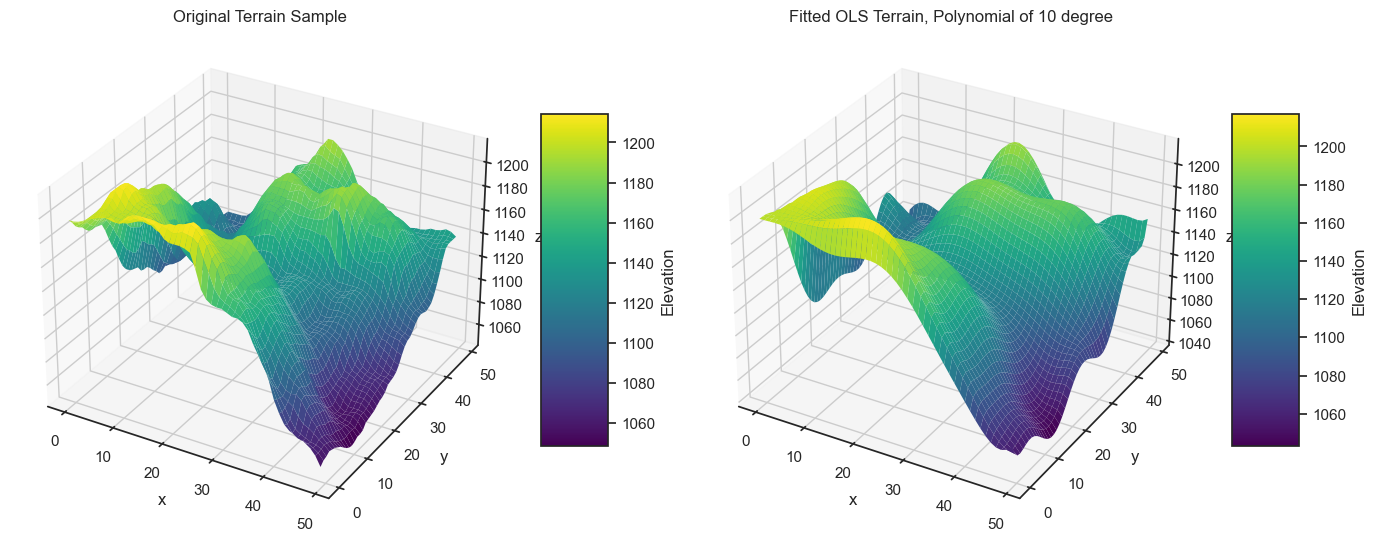

MSE 56.54435113555066
R2 0.9616610978282916


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(28975)
n, m = terrain1.shape

sample_size = 50        # --> MODIFY THIS FOR TESTING
degree = 10           # ––> MODIFY THIS FOR TESTING

start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)

terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

x_flat = x_sample.ravel()
y_flat = y_sample.ravel()
z_flat = terrain_sample.ravel()

X = np.column_stack((x_flat, y_flat))

poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Create and fit the model
model = LinearRegression()
model.fit(X_poly, z_flat)

# Predictions
z_pred = model.predict(X_poly)
MSE_OLS = mean_squared_error(z_flat, z_pred)
R2_OLS = r2_score(z_flat, z_pred)

# Reshape the predictions
z_pred_reshaped = z_pred.reshape(terrain_sample.shape)

fig = plt.figure(figsize=(14, 7))

# Original Terrain Plot
ax1 = fig.add_subplot(121, projection='3d')
surface1 = ax1.plot_surface(x_sample, y_sample, terrain_sample, cmap='viridis', edgecolor='none')
ax1.set_title('Original Terrain Sample')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
fig.colorbar(surface1, ax=ax1, shrink=0.5, aspect=5, label='Elevation')

# Fitted Terrain Plot
ax2 = fig.add_subplot(122, projection='3d')
surface2 = ax2.plot_surface(x_sample, y_sample, z_pred_reshaped, cmap='viridis', edgecolor='none')
ax2.set_title(f'Fitted OLS Terrain, Polynomial of {degree} degree')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
fig.colorbar(surface2, ax=ax2, shrink=0.5, aspect=5, label='Elevation')
plt.tight_layout()
plt.show()

print('MSE', MSE_OLS)
print("R2", R2_OLS)

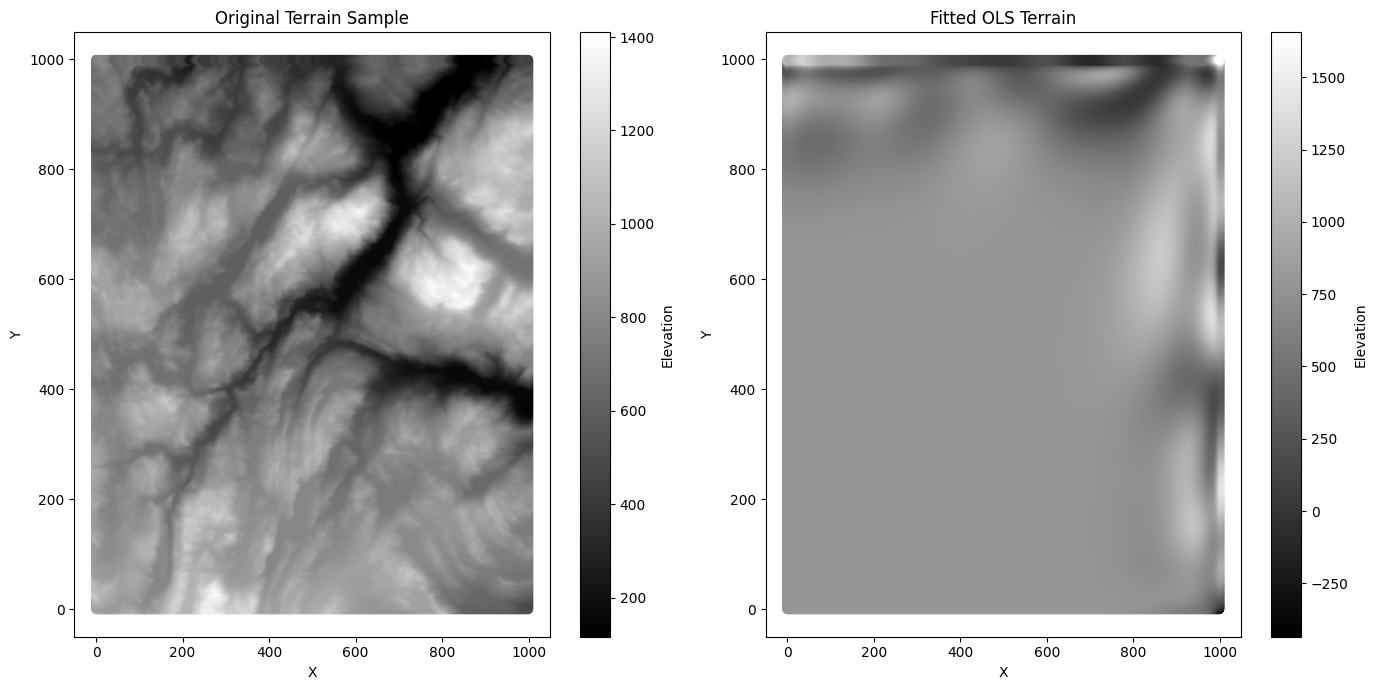

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

n, m = terrain1.shape

sample_size = 50        # --> MODIFY THIS FOR TESTING
degree = 10           # ––> MODIFY THIS FOR TESTING

start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)
terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

x_flat = x_sample.ravel()
y_flat = y_sample.ravel()
z_flat = terrain_sample.ravel()

X = np.column_stack((x_flat, y_flat))
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, z_flat)

z_pred = model.predict(X_poly)

# Create the figure for the plots
plt.figure(figsize=(14, 7))

# Original Terrain Plot
plt.subplot(1, 2, 1)
plt.scatter(x_flat, y_flat, c=z_flat, cmap='gray')
plt.colorbar(label='Elevation')
plt.title('Original Terrain Sample')
plt.xlabel('X')
plt.ylabel('Y')

# Fitted Terrain Plot
plt.subplot(1, 2, 2)
plt.scatter(x_flat, y_flat, c=z_pred, cmap='gray')
plt.colorbar(label='Elevation')
plt.title(f'Fitted OLS Terrain, Polynomial of {degree} degree')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()
